***Credit Score Card Management*** version by TeetyK

dataset : loan_data_2007_2014 from https://www.kaggle.com/datasets/devanshi23/loan-data-2007-2014/

# import Data & Libraries

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency

In [56]:
loan_data = pd.read_csv('.\\datasets\\loan_data_2007_2014.csv')

C:\Users\temp67\AppData\Local\Temp\ipykernel_23280\3429229190.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('.\\datasets\\loan_data_2007_2014.csv')


In [58]:
loan_data = loan_data.drop(columns=[loan_data.columns[0]])

# Data Exploration

In [59]:
loan_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [61]:
na_val = loan_data.isnull().mean()
na_val[na_val > 0.8]

mths_since_last_record       0.865666
annual_inc_joint             1.000000
dti_joint                    1.000000
verification_status_joint    1.000000
open_acc_6m                  1.000000
open_il_6m                   1.000000
open_il_12m                  1.000000
open_il_24m                  1.000000
mths_since_rcnt_il           1.000000
total_bal_il                 1.000000
il_util                      1.000000
open_rv_12m                  1.000000
open_rv_24m                  1.000000
max_bal_bc                   1.000000
all_util                     1.000000
inq_fi                       1.000000
total_cu_tl                  1.000000
inq_last_12m                 1.000000
dtype: float64

In [62]:
# ลบ data ที่ missing 80%
loan_data.dropna(thresh = loan_data.shape[0]*0.2,axis=1,inplace=True)
loan_data.drop(columns=['id','member_id','sub_grade',
                'emp_title','url','desc','title','zip_code'
                ,'next_pymnt_d','recoveries','collection_recovery_fee',
                'total_rec_prncp','total_rec_late_fee'],inplace=True)

In [63]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   emp_length                   445277 non-null  object 
 8   home_ownership               466285 non-null  object 
 9   annual_inc                   466281 non-null  float64
 10  verification_status          466285 non-null  object 
 11  issue_d                      466285 non-null  object 
 12  loan_status                  466285 non-null  object 
 13 

# Handle Outiler/Missing

In [64]:
loan_data['loan_status'].value_counts(normalize=True)

loan_status
Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: proportion, dtype: float64

In [65]:
# 0 คือลูกค้าไม่ดี 1 คือลูกค้าดี ไม่มีติดหนี้ค้างชำระ
loan_data['good_bad'] = np.where(loan_data.loc[:,'loan_status'].isin(['Charged Off','Default','Late (31-120 days)',
                'Does not meet the credit policy. Status:Charged Off']),0,1)
loan_data.drop(columns=['loan_status'],inplace=True)

In [66]:
loan_data['good_bad'].tail()

466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, dtype: int32

# Split Data

In [67]:
X = loan_data.drop('good_bad',axis=1)
y = loan_data['good_bad']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify= y)
X_train , X_test = X_train.copy() , X_test.copy() # avoid SettingWithCopyWarning

In [68]:
def emp_length_converter(df,column):
    df[column] = df[column].str.replace('\+ years','',regex=True)
    # df[column] = df[column].str.replace(r'\+','',regex=True)
    df[column] = df[column].str.replace('< 1 year',str(0),regex=True)
    df[column] = df[column].str.replace(' years','',regex=True)
    df[column] = df[column].str.replace(' year','',regex=True)
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value=0,inplace=True)
emp_length_converter(X_train,'emp_length')

C:\Users\temp67\AppData\Local\Temp\ipykernel_23280\1083151135.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(value=0,inplace=True)


In [69]:
import pandas as pd
import re

def parse_mon_yy_auto(x):
    """
    แปลงค่าเป็น datetime โดยใช้ regex สกัดเดือนและปี
    ปี 2 หลักจะถูกบวก 2000+
    """
    if pd.isnull(x):
        return pd.NaT
    x = str(x).strip()
    
    match = re.match(r'([A-Za-z]{3})-(\d{2})', x)
    if match:
        month_str, year_str = match.groups()
        year = 2000 + int(year_str)
        # สร้าง string แบบ '1 Jan 2014' ให้ pandas parse อัตโนมัติ
        date_str = f"1 {month_str} {year}"
        try:
            return pd.to_datetime(date_str)
        except:
            return pd.NaT
    return pd.NaT

X_train['issue_d'] = X_train['issue_d'].apply(parse_mon_yy_auto)
X_train['issue_d'] = X_train['issue_d'].dt.strftime("%d/%m/%Y")
X_train['earliest_cr_line'] = X_train['earliest_cr_line'].apply(parse_mon_yy_auto)
X_train['earliest_cr_line'] = X_train['earliest_cr_line'].dt.strftime("%d/%m/%Y")
X_train['last_pymnt_d'] = X_train['last_pymnt_d'].apply(parse_mon_yy_auto)
X_train['last_pymnt_d'] = X_train['last_pymnt_d'].dt.strftime("%d/%m/%Y")
X_train['last_credit_pull_d'] = X_train['last_credit_pull_d'].apply(parse_mon_yy_auto)
X_train['last_credit_pull_d'] = X_train['last_credit_pull_d'].dt.strftime("%d/%m/%Y")

# print(X_train[['issue_d', 'issue_d_str']].head())


In [70]:
# print(X_train['earliest_cr_line'].describe())
# print(X_train['issue_d'].describe())
# print(X_train['last_pymnt_d'].describe())
# print(X_train['last_credit_pull_d'].describe())
pd.to_datetime(X_train['issue_d']).dt.year

456615    2014
451541    2014
394474    2014
110294    2013
139343    2013
          ... 
163633    2013
399306    2014
57787     2013
81641     2013
38736     2008
Name: issue_d, Length: 373028, dtype: int32

In [71]:
def date_columns(df,column):
    today_date = pd.to_datetime("2020-08-01")
    # df[column] = pd.to_datetime(df[column],format='%b-%y',errors='coerce')
    df[column] = pd.to_datetime(df[column])
    df['mths_since_'+column] = (today_date.year - df[column].dt.year) * 12 + (today_date.month - df[column].dt.month)
    # print(df['mths_since_'+column].describe())
    df['mths_since_'+column] = df['mths_since_'+column].apply(lambda x: df['mths_since_'+column].max() if x < 0 else x)
    df.drop(columns =[column] , inplace=True)
date_columns(X_train,'earliest_cr_line')
date_columns(X_train,'issue_d')
date_columns(X_train,'last_pymnt_d')
date_columns(X_train,'last_credit_pull_d')

In [72]:
print(X_train['mths_since_earliest_cr_line'].describe())
print(X_train['mths_since_issue_d'].describe())
print(X_train['mths_since_last_pymnt_d'].describe())
print(X_train['mths_since_last_credit_pull_d'].describe())

count    373003.000000
mean        230.289443
std          28.212800
min         115.000000
25%         223.000000
50%         247.000000
75%         247.000000
max         247.000000
Name: mths_since_earliest_cr_line, dtype: float64
count    373028.000000
mean         89.337980
std          14.119055
min          79.000000
25%          79.000000
50%          79.000000
75%          91.000000
max         163.000000
Name: mths_since_issue_d, dtype: float64
count    372717.000000
mean         67.493694
std          14.277159
min          55.000000
25%          55.000000
50%          67.000000
75%          67.000000
max         163.000000
Name: mths_since_last_pymnt_d, dtype: float64
count    372998.000000
mean         60.932761
std          11.524318
min          55.000000
25%          55.000000
50%          55.000000
75%          67.000000
max         163.000000
Name: mths_since_last_credit_pull_d, dtype: float64


In [73]:
def loan_term_converter(df,column):
    df[column] = pd.to_numeric(df[column].str.replace(' months',''))
loan_term_converter(X_train,'term')

# Feature Selection

In [110]:
X_train_cat = X_train.select_dtypes(include='object').copy()
X_train_num = X_train.select_dtypes(include='number').copy()

Chi-Squared for cat features

In [111]:
chi2_check = {}
for col in X_train_cat:
    chi , p , dof , ex = chi2_contingency(pd.crosstab(y_train,X_train_cat[col]))
    chi2_check.setdefault('Feature',[]).append(col)
    chi2_check.setdefault('p-value',[]).append(round(p,10))
chi2_result = pd.DataFrame(data = chi2_check)
chi2_result = chi2_result.sort_values(by=['p-value'] , ascending = True)

F-Stat for num features

In [112]:
X_train_num.fillna(X_train_num.mean() , inplace=True)
F_stat , p_values = f_classif(X_train_num , y_train)
ANOVA_F_table = pd.DataFrame(data = {'Numberical_Feature': X_train_num.columns.values , 'F-Score': F_stat,'p values':p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by=['F-Score'],ascending=False )

,Numberical_Feature,F-Score,p values
18,total_pymnt,14686.729567,0.000000e+00
4,int_rate,11462.788313,0.000000e+00
17,out_prncp,9635.116160,0.000000e+00
10,inq_last_6mths,2003.820465,0.000000e+00
3,term,1590.811890,0.000000e+00
15,revol_util,931.880533,0.000000e+00
8,dti,863.811228,0.000000e+00
7,annual_inc,861.298449,0.000000e+00
16,total_acc,208.751175,0.000000e+00
6,emp_length,146.954085,0.000000e+00


In [113]:
# X_train_num = X_train_num.drop(columns=['Unnamed: 0'])

In [114]:
# ANOVA_F_table = ANOVA_F_table.iloc[1:,:]

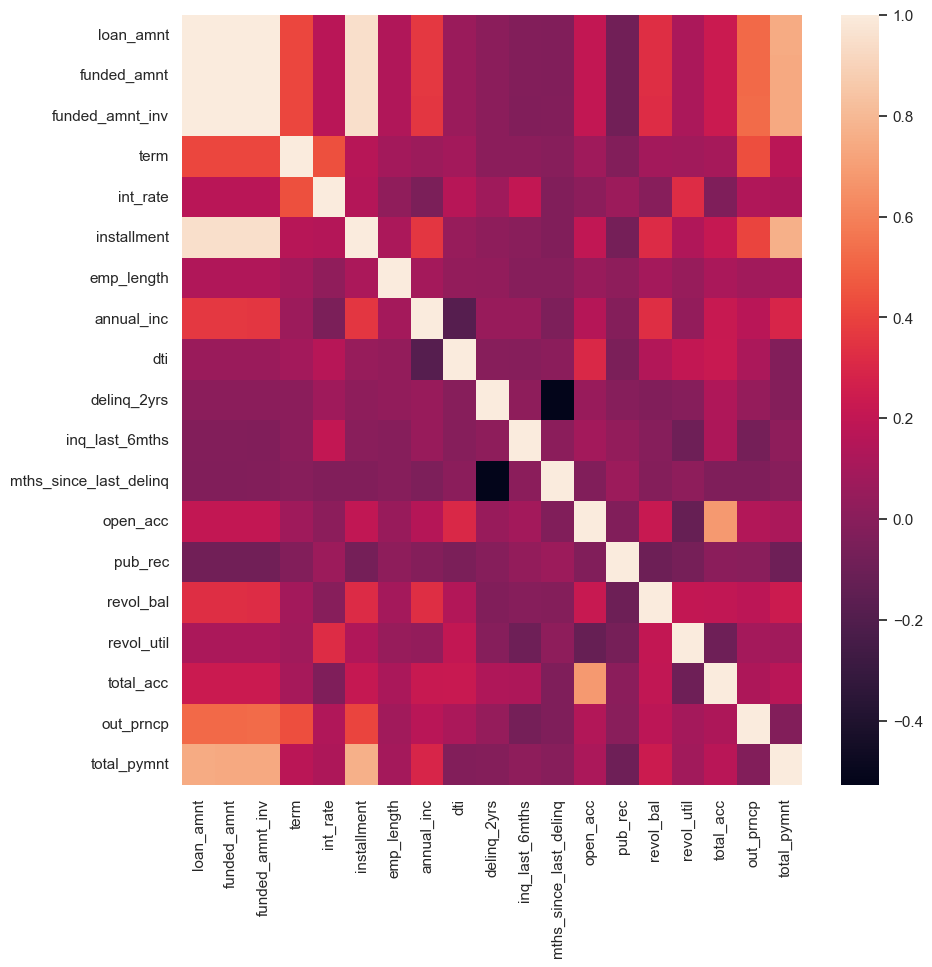

In [115]:
top_num_features = ANOVA_F_table.iloc[:20,0].to_list()
corrmat = X_train_num[top_num_features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat);

In [116]:
# Define a helper function to drop the 4 categorical features with least p-values for chi squared test, 14 numerical features with least F-Statistic
# and 2 numerical features with high multicollinearity
drop_columns_list = ANOVA_F_table.iloc[20:, 0].to_list()
drop_columns_list.extend(chi2_result.iloc[4:, 0].to_list())
drop_columns_list.extend(['out_prncp_inv', 'total_pymnt_inv'])

def col_to_drop(df, columns_list):
    df.drop(columns = columns_list, inplace = True)

# apply to X_train
col_to_drop(X_train, drop_columns_list)

KeyError: "['out_prncp_inv', 'total_pymnt_inv'] not found in axis"

# Test Data

In [ ]:
X_train.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt'],
      dtype='object')

In [ ]:
# X_train = X_train.drop(columns=['Unnamed: 0'])

In [ ]:
# function to create dummy variables
def dummy_creation(df, columns_list):
    df_dummies = []
    for col in columns_list:
        df_dummies.append(pd.get_dummies(df[col], prefix = col, prefix_sep = ':'))
    df_dummies = pd.concat(df_dummies, axis = 1)
    df = pd.concat([df, df_dummies], axis = 1)
    return df

# apply to our final four categorical variables
X_train = dummy_creation(X_train, ['grade', 'home_ownership', 'verification_status', 'purpose'])

In [ ]:
emp_length_converter(X_test, 'emp_length')
X_test['issue_d'] = X_test['issue_d'].apply(parse_mon_yy_auto)
X_test['issue_d'] = X_test['issue_d'].dt.strftime("%d/%m/%Y")
X_test['earliest_cr_line'] = X_test['earliest_cr_line'].apply(parse_mon_yy_auto)
X_test['earliest_cr_line'] = X_test['earliest_cr_line'].dt.strftime("%d/%m/%Y")
X_test['last_pymnt_d'] = X_test['last_pymnt_d'].apply(parse_mon_yy_auto)
X_test['last_pymnt_d'] = X_test['last_pymnt_d'].dt.strftime("%d/%m/%Y")
X_test['last_credit_pull_d'] = X_test['last_credit_pull_d'].apply(parse_mon_yy_auto)
X_test['last_credit_pull_d'] = X_test['last_credit_pull_d'].dt.strftime("%d/%m/%Y")

date_columns(X_test, 'earliest_cr_line')
date_columns(X_test, 'issue_d')
date_columns(X_test, 'last_pymnt_d')
date_columns(X_test, 'last_credit_pull_d')
loan_term_converter(X_test, 'term')
col_to_drop(X_test, drop_columns_list)
X_test = dummy_creation(X_test, ['grade', 'home_ownership', 'verification_status', 'purpose'])
# reindex the dummied test set variables to make sure all the feature columns in the train set are also available in the test set
X_test = X_test.reindex(labels=X_train.columns, axis=1, fill_value=0)

C:\Users\temp67\AppData\Local\Temp\ipykernel_23280\1083151135.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(value=0,inplace=True)


In [ ]:
X_train_prepr = X_train.copy()
y_train_prepr = y_train.copy()
X_test_prepr = X_test.copy()
y_test_prepr = y_test.copy()

# WOEs and IVs of Feature

In [86]:
# The function takes 3 arguments: a dataframe (X_train_prepr), a string (column name), and a dataframe (y_train_prepr).
# The function returns a dataframe as a result.
def woe_discrete(df, cat_variabe_name, y_df):
    df = pd.concat([df[cat_variabe_name], y_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [87]:
# We set the default style of the graphs to the seaborn style. 
sns.set()
# Below we define a function for plotting WoE across categories that takes 2 arguments: a dataframe and a number.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)    

In [88]:
df_temp = woe_discrete(X_train_prepr, 'grade', y_train_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2623,0.721693,0.007032,1893.0,730.0,0.005697,0.017904,-1.144981,NaN,NaN,0.292145
1,F,10606,0.758061,0.028432,8040.0,2566.0,0.024198,0.062932,-0.955774,0.036369,0.189207,0.292145
2,E,28590,0.804477,0.076643,23000.0,5590.0,0.069224,0.137097,-0.683340,0.046416,0.272434,0.292145
3,D,61713,0.845527,0.165438,52180.0,9533.0,0.157049,0.233801,-0.397915,0.041050,0.285425,0.292145
4,C,100342,0.885870,0.268993,88890.0,11452.0,0.267536,0.280865,-0.048620,0.040343,0.349295,0.292145
5,B,109344,0.921422,0.293125,100752.0,8592.0,0.303238,0.210723,0.363975,0.035552,0.412595,0.292145
6,A,59810,0.961361,0.160336,57499.0,2311.0,0.173057,0.056678,1.116232,0.039939,0.752257,0.292145


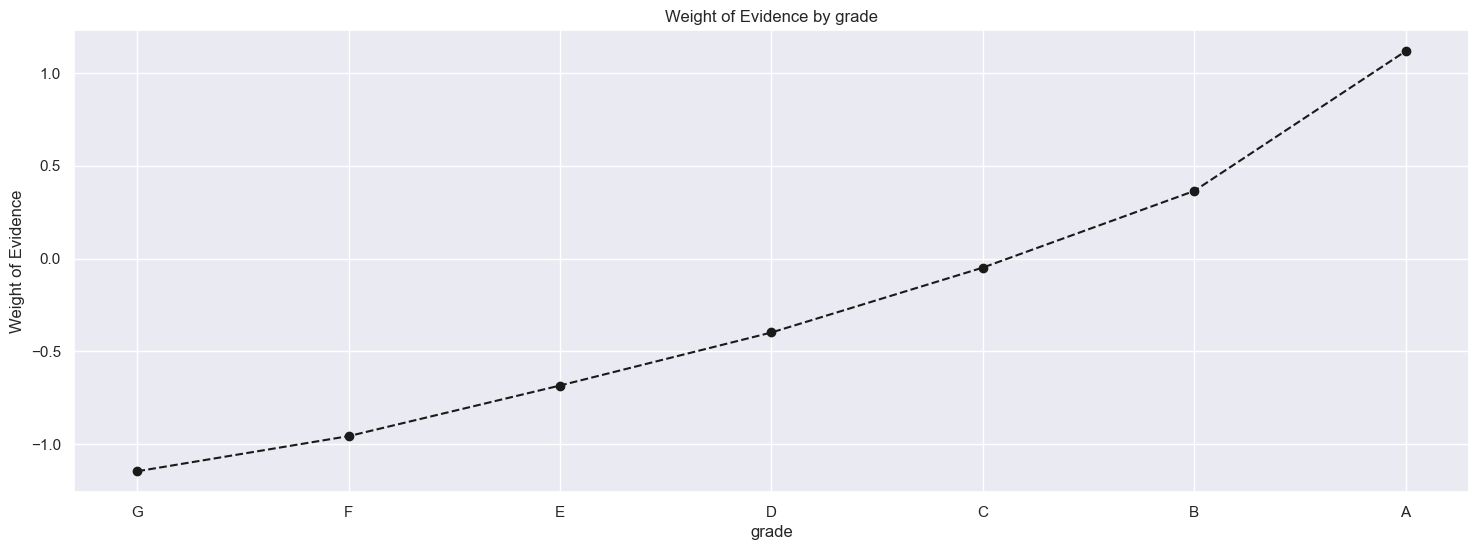

In [89]:
plot_by_woe(df_temp)

In [100]:
def woe_ordered_continuous(df, continuous_variabe_name, y_df):
    df = pd.concat([df[continuous_variabe_name], y_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [101]:
df_temp = woe_ordered_continuous(X_train_prepr, 'term', y_train_prepr)
df_temp

,term,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,270199,0.903238,0.72434,244054.0,26145.0,0.73454,0.641217,0.135876,NaN,NaN,0.040794
1,60,102829,0.857735,0.27566,88200.0,14629.0,0.26546,0.358783,-0.301254,0.045503,0.43713,0.040794


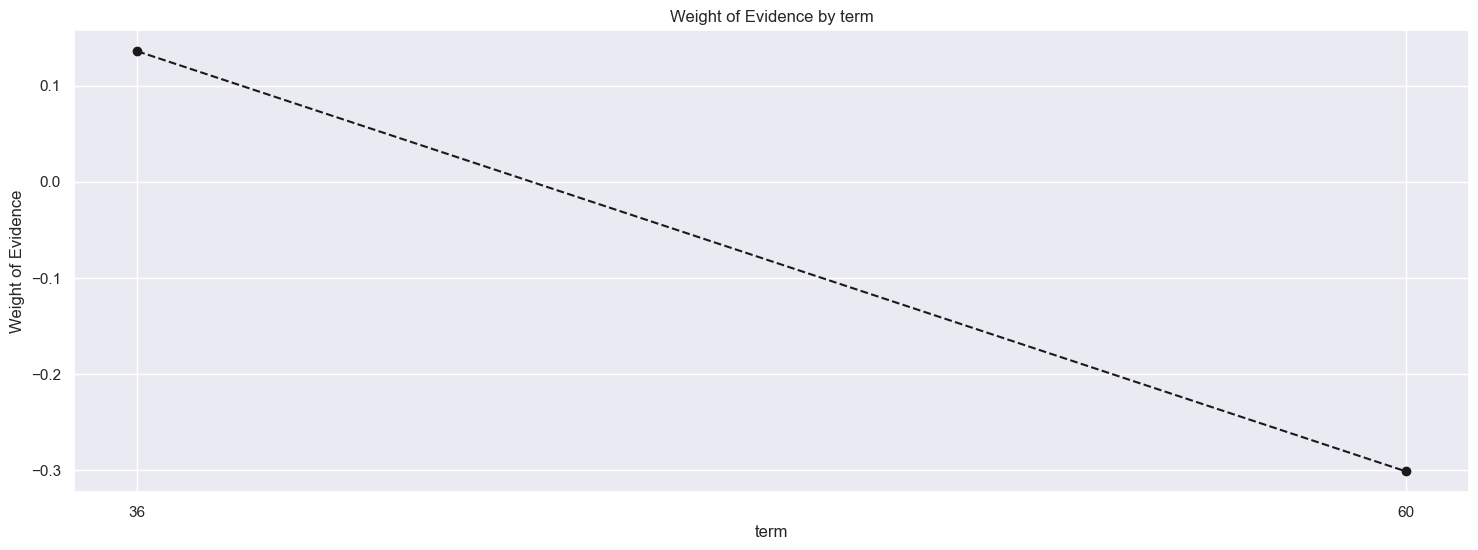

In [102]:
plot_by_woe(df_temp)

In [99]:
Cut_Stat = pd.DataFrame(columns=['Custer','Feature','Cluster-Own-R2','Cluster-Other-R2','1-R2','IV value'])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
df_feature_num = pd.DataFrame()
# scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_num.T)
# k-means

kmeans = KMeans(n_clusters=3, random_state=42)
df_feature_num['Cluster'] = pd.DataFrame(kmeans.fit_predict(X_scaled))
df_feature_num['Feature'] = X_train_num.T.index
# OC_R2



In [160]:
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [163]:
# len(cluster_labels)
centroids

array([[ 3.89753597,  3.90287163,  3.16907347, ...,  3.29771178,
         3.93810573,  4.09610251],
       [-0.46512026, -0.43597043, -0.53768438, ..., -0.56616109,
        -0.45294969, -0.36717837],
       [ 0.42980549,  0.3529488 ,  0.7641647 , ...,  0.81247648,
         0.39004805,  0.13544327]])

In [145]:
df_feature_num

,Cluster,Feature
0,2,loan_amnt
1,2,funded_amnt
2,2,funded_amnt_inv
3,1,term
4,1,int_rate
5,1,installment
6,1,emp_length
7,0,annual_inc
8,1,dti
9,1,delinq_2yrs
